# Figure 5: Specify the Correct Demographic Model

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import scipy.stats as stats 
from matplotlib.lines import Line2D 

## Load the Data

In [25]:
syn_theta_data = {'African_SynSel': {'1': 1888.3664132880638, '2': 1963.0306209747378, '3': 1895.5311673144795, '4': 2032.9628315933096, '5': 2007.0062104252743, '6': 1949.7135018418915, '7': 1965.1340734463256, '8': 1950.3506966336474, '9': 2011.439116842716, '10': 1875.879878102463}, 
                  'African_NoSynSel': {'1': 3026.73516818535, '2': 3268.728601288132, '3': 3461.8313531486683, '4': 3345.665862002205, '5': 3402.272179274338, '6': 3326.201313757382, '7': 3223.278782016734, '8': 3275.2560349648525, '9': 3249.726796430125, '10': 3238.2084070622923}, 
                  'African_NeutralDemSynSel': {'1': 3024.9536231629177, '2': 3268.8419110470077, '3': 3460.878268537569, '4': 3346.0363999659558, '5': 3401.890258151848, '6': 3326.2994166079698, '7': 3224.104069160529, '8': 3276.378063524776, '9': 3248.905048803785, '10': 3238.074498410888}, 
                  'European_SynSel': {'1': 1896.9732384714623, '2': 1953.3624615563049, '3': 1907.3636825831609, '4': 2023.6795079210897, '5': 2003.9379353083912, '6': 1913.0016737425835, '7': 1914.16753946598, '8': 1960.605045333849, '9': 2007.5476912198803, '10': 1890.6106930671162}, 
                  'European_NoSynSel': {'1': 3029.3651286744216, '2': 3234.0386688837857, '3': 3475.519027010704, '4': 3346.3898054052584, '5': 3375.847167989876, '6': 3303.0839721084667, '7': 3265.2738748271727, '8': 3288.592611954262, '9': 3219.244518116322, '10': 3246.713900704758}, 
                  'European_NeutralDemSynSel': {'1': 3030.7400969867676, '2': 3233.5455881299176, '3': 3476.180375496917, '4': 3344.814419931682, '5': 3376.2413207113996, '6': 3303.436678575177, '7': 3263.9540409559113, '8': 3290.200385195544, '9': 3219.368948383428, '10': 3247.182799287167}
                 }

In [26]:
dfe_parameters_data={'African_SynSel': {'1': [0.102889609, 1282.49329], '2': [0.0845518951, 3993.75766], '3': [0.0837226462, 3988.05988], '4': [0.0999684974, 1859.26742], '5': [0.0829543111, 5320.43434], '6': [0.0784475245, 6748.49264], '7': [0.0847112375, 4206.44729], '8': [0.0944325222, 2223.43239], '9': [0.0947589008, 2277.93426], '10': [0.0706052517, 14007.1016]}, 
                     'African_NoSynSel': {'1': [0.177268464, 880.563114], '2': [0.179105811, 933.715336], '3': [0.196612236, 618.154514], '4': [0.180879546, 940.557657], '5': [0.17751118, 1018.99634], '6': [0.185319176, 843.858835], '7': [0.190473971, 618.379331], '8': [0.194821928, 626.429358], '9': [0.183722673, 823.502159], '10': [0.190724378, 713.448469]}, 
                     'African_NeutralDemSynSel': {'1': [0.193704503, 514.137942], '2': [0.175220911, 1147.37572], '3': [0.192436793, 719.310658], '4': [0.189673553, 770.389031], '5': [0.180988437, 1096.18573], '6': [0.19209636, 580.352332], '7': [0.189008941, 748.141206], '8': [0.187369127, 784.917735], '9': [0.184858629, 835.072571], '10': [0.184283818, 874.713918]}, 
                     'European_SynSel': {'1': [0.0852054642, 4565.36257], '2': [0.0814416776, 5484.36707], '3': [0.0812842563, 5040.48856], '4': [0.101515021, 1595.45919], '5': [0.0898459828, 2653.56936], '6': [0.0839665103, 3989.32067], '7': [0.0950989844, 1947.61903], '8': [0.0923157075, 2543.87789], '9': [0.0946271232, 2025.76214], '10': [0.0737089342, 10793.381]}, 
                     'European_NoSynSel': {'1': [0.176363909, 925.122984], '2': [0.179718423, 895.598163], '3': [0.195969448, 651.277792], '4': [0.18165529, 931.024683], '5': [0.187574067, 757.285968], '6': [0.186499017, 828.611646], '7': [0.184608926, 738.125876], '8': [0.186923027, 776.841611], '9': [0.178953409, 950.603944], '10': [0.194338469, 642.07989]}, 
                     'European_NeutralDemSynSel': {'1': [0.181704439, 708.386543], '2': [0.17578651, 1098.02312], '3': [0.189028489, 793.088256], '4': [0.184718445, 860.81631], '5': [0.186364512, 898.654934], '6': [0.19010822, 619.516465], '7': [0.189291498, 750.398054], '8': [0.190118059, 727.056615], '9': [0.183719685, 833.330343], '10': [0.185495177, 864.697049]}
                    }

In [27]:
#True parameters
shape_true=0.186
scale_true=875.0
true_Na=12378
mu=1.44E-8
Ls=5323177

In [28]:
#in terms of s_het
s_het_kim=scale_true/(2*true_Na) #True scale parameter in terms of s

#True parameters
s_dhet_true=s_het_kim

#Generate a discretized true DFE
a=shape_true
b=s_dhet_true

gamma_draws=stats.gamma.rvs(a, scale=b,size=100000)
counts,edges=np.histogram(gamma_draws,bins=[0,1E-5,1E-4,1E-3,1E-2,800000000000])
norm_counts=counts/100000
s_dhet_discretized_true=norm_counts

In [29]:
s_dhet_discretized_true

array([0.23745, 0.12623, 0.19254, 0.26615, 0.17763])

In [30]:
order_plotting=['African_SynSel', 'African_NeutralDemSynSel', 'European_SynSel', 'European_NeutralDemSynSel']

color_conditions={'SLiM_True_DFE':'#99b3ff', 'African_NoSynSel':'#9bc238', 'European_NoSynSel':'#267326', 'African_SynSel':'#cc0000',
                  'European_SynSel': '#ff6600', 'African_NeutralDemSynSel':'#cc0000','European_NeutralDemSynSel':'#ff6600'}

title_conditions={'SLiM_True_DFE':'True model', 
                  'African_NoSynSel':'Africa, s=0', 
                  'European_NoSynSel':'Europe, s=0', 
                  'African_SynSel':'$Africa, s=DFE_{Syn}$',
                  'European_SynSel': '$Europe, s=DFE_{Syn}$',
                 'African_NeutralDemSynSel':'$Africa, s=DFE_{Syn}$, syn neutral',
                 'European_NeutralDemSynSel':'$Europe, s=DFE_{Syn}$, syn neutral'}

model_tips={'African_SynSel':'o', 
            'African_NoSynSel':'o',
            'African_NeutralDemSynSel':'^', 
            'European_SynSel':'o',
            'European_NoSynSel':'o',
            'European_NeutralDemSynSel':'^'}

In [31]:
dfe_parameters_data.keys()

dict_keys(['African_SynSel', 'African_NoSynSel', 'African_NeutralDemSynSel', 'European_SynSel', 'European_NoSynSel', 'European_NeutralDemSynSel'])

# Get the Ne

In [32]:
Na_fromSim={}

for i in syn_theta_data: 
    Na_fromSim_replicate={k:(v/(4*Ls*mu)) for k,v in syn_theta_data[i].items()}
    Na_fromSim[i]=Na_fromSim_replicate

### Create dataframe for plotting of the DFE Results

In [33]:
#Build a dataframe for the data for plotting
dfe_dataframe=[] #row of the format condition, type(either Na or Ncurr), replicate_id, N_value

for condition in dfe_parameters_data:   
    new_rows=[[condition, replicate_id, dfe_parameters_data[condition][replicate_id][0], dfe_parameters_data[condition][replicate_id][1], syn_theta_data[condition][replicate_id]] for replicate_id in dfe_parameters_data[condition].keys()]
    dfe_dataframe=dfe_dataframe+new_rows

DFE_dataframe=pd.DataFrame(dfe_dataframe, columns=['Condition','Replicate_ID', 'Shape_Param', 'Scale_Param', 'Syn_Theta'])

In [34]:
#Obtain the Na and add it to the dataframe
DFE_dataframe['Na']=DFE_dataframe['Syn_Theta']/(4*Ls*mu)

In [35]:
#Put the Scale_parameter in terms of s_dhet
#Pass the scale parameter to s_dhet, by doing s_dhet=b/(2*N_a)

DFE_dataframe['s_dhet']=DFE_dataframe['Scale_Param']/(2*DFE_dataframe['Na'])

In [36]:
DFE_dataframe

,Condition,Replicate_ID,Shape_Param,Scale_Param,Syn_Theta,Na,s_dhet
0,African_SynSel,1,0.102890,1282.493290,1888.366413,6158.754278,0.104120
1,African_SynSel,2,0.084552,3993.757660,1963.030621,6402.265550,0.311902
2,African_SynSel,3,0.083723,3988.059880,1895.531167,6182.121543,0.322548
3,African_SynSel,4,0.099968,1859.267420,2032.962832,6630.343797,0.140209
4,African_SynSel,5,0.082954,5320.434340,2007.006210,6545.688377,0.406408
5,African_SynSel,6,0.078448,6748.492640,1949.713502,6358.832844,0.530639
6,African_SynSel,7,0.084711,4206.447290,1965.134073,6409.125790,0.328161
7,African_SynSel,8,0.094433,2223.432390,1950.350697,6360.911003,0.174773
8,African_SynSel,9,0.094759,2277.934260,2011.439117,6560.145943,0.173619
9,African_SynSel,10,0.070605,14007.101600,1875.879878,6118.030453,1.144739


# Grid Figure with empty circles

In [37]:
plt.rcParams['font.size'] = '18'

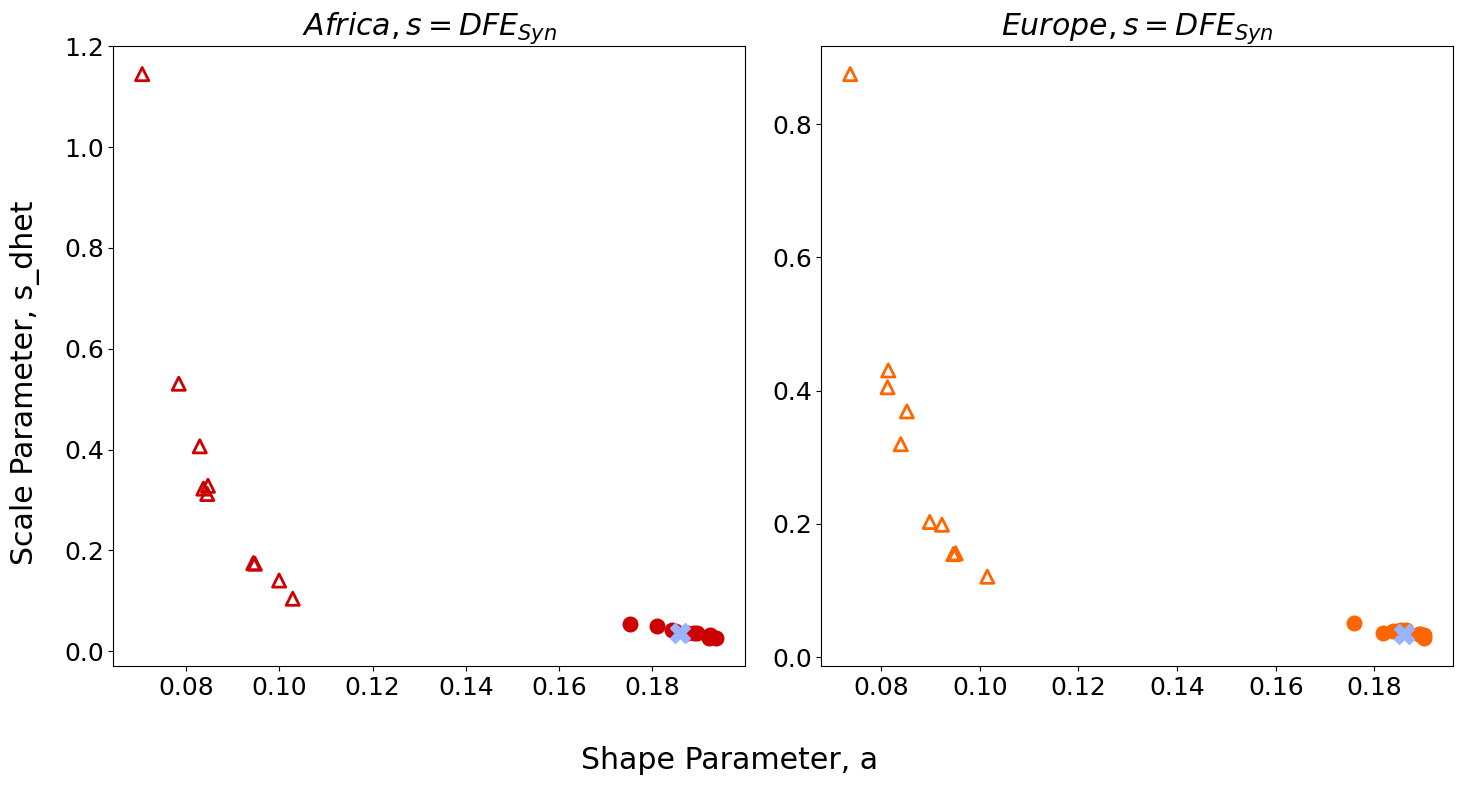

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15,8),tight_layout=True) #constrained_layout=True or tight_layout=True, sharey=True
fig.supxlabel('Shape Parameter, a')
fig.supylabel('Scale Parameter, s_dhet')


#Add one plot at a time

#Africa
ax_curr=axs[0]
order_plotting=['African_SynSel', 'African_NeutralDemSynSel']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('$Africa, s=DFE_{Syn}$')


#Europe
ax_curr=axs[1]
order_plotting=['European_SynSel', 'European_NeutralDemSynSel']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('$Europe, s=DFE_{Syn}$')


plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/Fig5.jpg", bbox_inches='tight', dpi=300)

## Insets

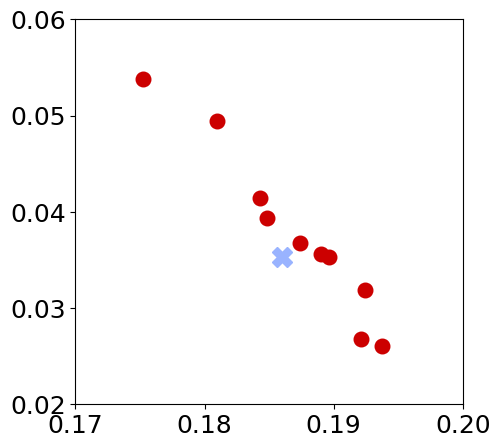

In [48]:
order_plotting=['African_SynSel', 'African_NeutralDemSynSel']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]

#Generate an insert
fig=plt.figure(figsize=[5,5])
ax=plt.gca()
plt.rcParams['font.size'] = '18'
ax.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])

plt.xlabel("")
plt.ylabel("")
plt.xlim(0.17, 0.2)
plt.ylim(0.02,0.06)

condition=order_plotting[0] 
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/Fig5Insert"+condition+".jpg", bbox_inches='tight', dpi=300)

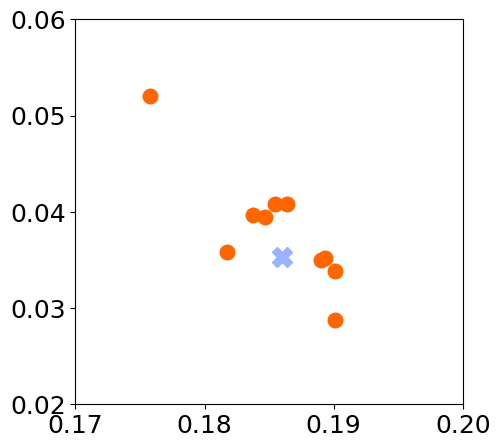

In [49]:
order_plotting=['European_SynSel', 'European_NeutralDemSynSel']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]

#Generate an insert
fig=plt.figure(figsize=[5,5])
ax=plt.gca()
plt.rcParams['font.size'] = '18'
ax.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])

plt.xlabel("")
plt.ylabel("")
plt.xlim(0.17, 0.2)
plt.ylim(0.02,0.06)

condition=order_plotting[0] 
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/Fig5Insert"+condition+".jpg", bbox_inches='tight', dpi=300)

## Generate legend

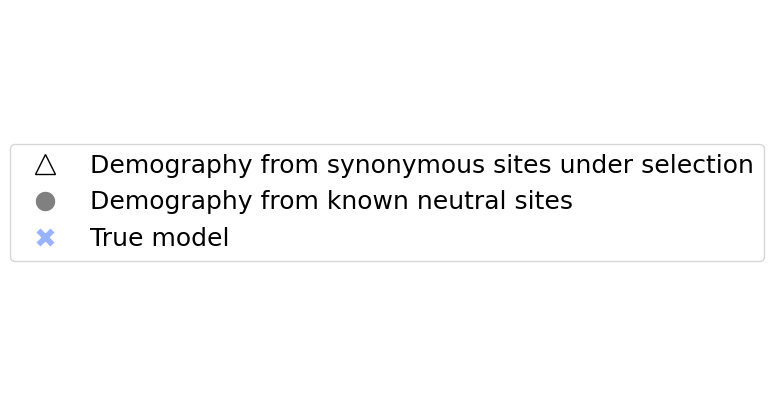

In [21]:
fig= plt.figure(figsize=[5,5])
ax=plt.gca()

legend_elements=[Line2D([0], [0], marker='^', color='w', label='Demography from synonymous sites under selection',
                          markerfacecolor='w', markersize=15, markeredgecolor='0'),
                Line2D([0], [0], marker='o', color='w', label='Demography from known neutral sites',
                          markerfacecolor='0.5', markersize=15),
                Line2D([0], [0], marker='X', color='w', label='True model',
                          markerfacecolor='#99b3ff', markersize=15)]

ax.legend(handles=legend_elements, loc='center')

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()

## Supplementary Figure 10

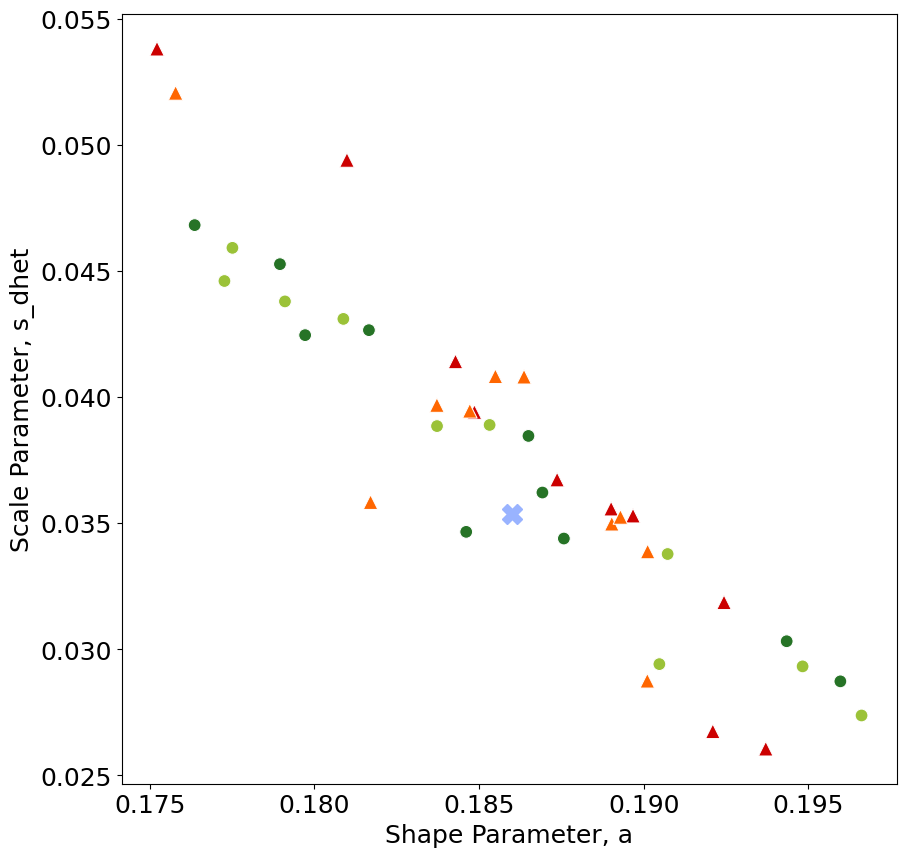

In [22]:
order_plotting=['African_NoSynSel', 'African_NeutralDemSynSel', 'European_NoSynSel', 'European_NeutralDemSynSel']

fig=plt.figure(figsize=[10,10])
ax_curr=plt.gca()
plt.rcParams['font.size'] = '18'

DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False, markers=model_tips,
                sizes=[85,110,85,110],size='Condition')
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('Scale Parameter, s_dhet')
ax_curr.set_xlabel('Shape Parameter, a')
#ax_curr.set_title('100% at s=1e-5')

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SuppFig13.jpg", bbox_inches='tight', dpi=300)

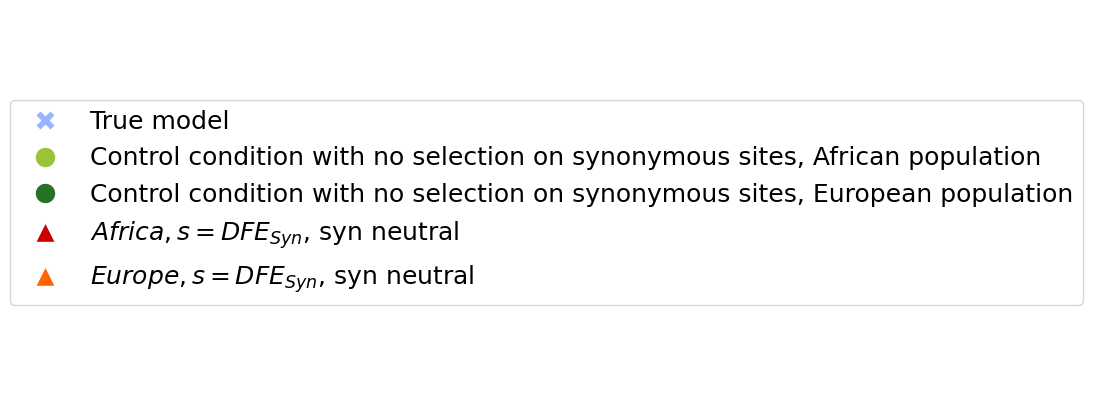

In [23]:
fig= plt.figure(figsize=[5,5])
ax=plt.gca()

legend_elements=[Line2D([0], [0], marker='X', color='w', label='True model',
                          markerfacecolor='#99b3ff', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='Control condition with no selection on synonymous sites, African population',
                          markerfacecolor=color_conditions['African_NoSynSel'], markersize=15),
                Line2D([0], [0], marker='o', color='w', label='Control condition with no selection on synonymous sites, European population',
                          markerfacecolor=color_conditions['European_NoSynSel'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['African_NeutralDemSynSel'],
                          markerfacecolor=color_conditions['African_NeutralDemSynSel'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['European_NeutralDemSynSel'],
                          markerfacecolor=color_conditions['European_NeutralDemSynSel'], markersize=15)]

ax.legend(handles=legend_elements, loc='center')

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SupplFig13Legend.jpg", bbox_inches='tight', dpi=300)

## Check Values

In [21]:
DFE_dataframe[DFE_dataframe['Condition']=='E5_Partial']

,Condition,Replicate_ID,Shape_Param,Scale_Param,Syn_Theta,Na,s_dhet
80,E5_Partial,1,0.172241,1.347932e+03,5386.228054,9227.991843,0.073035
81,E5_Partial,2,0.188250,6.686636e+02,5686.420880,9742.299244,0.034318
82,E5_Partial,3,0.201411,4.627937e+02,5680.046618,9731.378497,0.023778
83,E5_Partial,4,0.177977,1.049618e+03,5399.760069,9251.175661,0.056729
84,E5_Partial,5,0.168839,5.927183e+06,1024.234332,1754.776434,1688.871173
85,E5_Partial,6,0.187195,7.353140e+02,5494.132017,9412.859043,0.039059
86,E5_Partial,7,0.166321,5.822577e+03,4048.956885,6936.902919,0.419681
87,E5_Partial,8,0.192069,6.113320e+02,5782.614283,9907.103246,0.030853
88,E5_Partial,9,0.180829,8.203444e+02,5645.366350,9671.962292,0.042408
89,E5_Partial,10,0.198677,5.207036e+02,5730.074914,9817.089815,0.026520
